<a href="https://colab.research.google.com/github/xyzall1/TUBES-AI/blob/main/TUBES_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### KECERDASAN BUATAN || TUGAS BESAR FUZZY
# **SISTEM FUZZY UNTUK MEMPREDIKSI RISIKO PENYAKIT JANTUNG BERDASARKAN DATA MEDIS**

### Anggota Kelompok
1. Rosa Nur Aliana Sawafi (2311110008)
2. Ardelia Rachma Laksita (2311110051)

# **PENDAHULUAN DAN PEMAPARAN DATA**

Kasus yang ingin diselesaikan adalah prediksi risiko penyakit jantung berdasarkan data medis. dengan dataset klasifikasi penyakit jantung, prediksi dapat dilakukan berdasarkan atribut-atribut yang disertai dengan kesesuaian dengan fuzzy rule.

Mengapa kasus ini harus dipecahkan?
1. Membantu prediksi dini dalam identifikasi risiko penyakit jantung pada tahap awal.
2. Mendukung dokter dalam membuat keputusan objektif yang berbasis data
3. Meningkatkan akurasi dalam bentuk angka pada data medis sehingga lebih akurat

Terdapat 10 atribut atau fitur (input):
- Usia (age): Muda, Dewasa, Tua.
- Jenis nyeri dada (cp): Tidak nyeri, Sedikit nyeri, Nyeri berat.
- Tekanan darah saat istirahat (trestbps): Rendah, Normal, Tinggi.
- Kadar kolesterol serum (chol): Rendah, Normal, Tinggi.
- Gula darah puasa (fbs): Normal, Tinggi.
- Hasil elektrokardiografi (restecg): Normal, Abnormal.
- Detak jantung maksimum (thalach): Rendah, Normal, Tinggi.
- Depresi segmen ST (oldpeak): Tidak tertekan, Sedikit tertekan, Sangat tertekan.
- Jumlah pembuluh darah (ca): Tidak ada (0), Sedikit (1-2), Banyak (3+).
- Penyakit genetik thalasemia (thal): Normal, Cacat ringan, Cacat berat.

Terdapat 1 output (target):
- Risiko Penyakit Jantung: Rendah, Sedang, Tinggi.

Sumber Dataset: https://www.kaggle.com/code/jabirmuktabir/klasifikasi-penyakit-jantung/input



## **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

## **EDA**

In [ ]:
# Load dataset
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#statistik data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# summary of statistik data
data.describe().sum()

,0
age,635.948438
sex,307.149179
cp,310.999049
trestbps,1136.161905
chol,2016.594777
fbs,304.504713
restecg,308.053912
thalach,1201.052026
exang,305.796527
oldpeak,313.800679


## **PRE-PROCESSING**

In [ ]:
#cek missing value
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Berdasarkan output di samping, dataset tersebut tidak memiliki missing value sehingga tidak memerlukan langkah untuk menyelesaikan atau mengatasi missing value terlebih dahulu.

## **VISUALISASI**

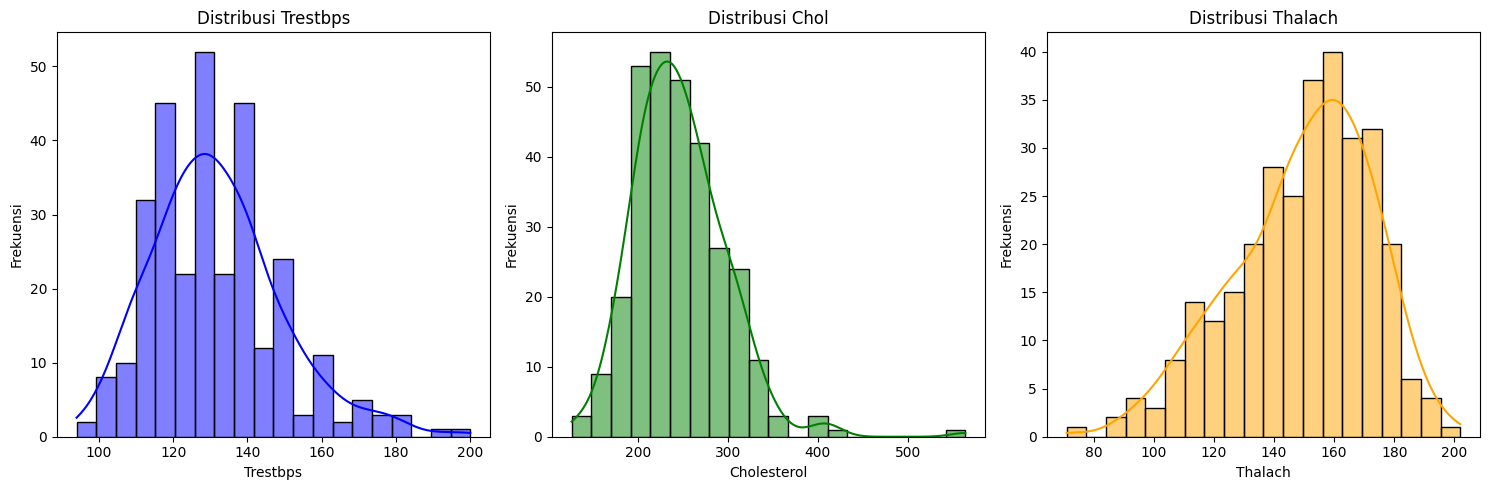

In [ ]:
# Visualisasi distribusi dari fitur 'trestbps', 'chol', dan 'thalach'
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['trestbps'], bins=20, kde=True, color='blue')
plt.title('Distribusi Trestbps')
plt.xlabel('Trestbps')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 2)
sns.histplot(data['chol'], bins=20, kde=True, color='green')
plt.title('Distribusi Chol')
plt.xlabel('Cholesterol')
plt.ylabel('Frekuensi')

plt.subplot(1, 3, 3)
sns.histplot(data['thalach'], bins=20, kde=True, color='orange')
plt.title('Distribusi Thalach')
plt.xlabel('Thalach')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

# **METODE FUZZY MAMDANI**


Metode Mamdani adalah metode yang diterapkan dengan komposisi aturan min-max. Fungsi min untuk mengjitung minimum dari setiap aturan terhadap setiap output. Sedangkan fungsi max untuk mencari alpha predikat tertinggi dari fungsi minimum yang telah didapat.

## Fungsi Keanggotaan

In [ ]:
# Fungsi keanggotaan untuk Trestbps
def trestbps_membership(x):
    if x < 120:
        return 1, 0, 0  # Rendah, Normal, Tinggi
    elif 120 <= x < 140:
        return (140 - x) / 20, (x - 120) / 20, 0
    elif 140 <= x < 160:
        return 0, (160 - x) / 20, (x - 140) / 20
    else:
        return 0, 0, 1

# Fungsi keanggotaan untuk Chol
def chol_membership(x):
    if x < 200:
        return 1, 0, 0  # Rendah, Normal, Tinggi
    elif 200 <= x < 240:
        return (240 - x) / 40, (x - 200) / 40, 0
    elif 240 <= x < 260:
        return 0, (260 - x) / 20, (x - 240) / 20
    else:
        return 0, 0, 1

# Fungsi keanggotaan untuk Thalach
def thalach_membership(x):
    if x < 60:
        return 1, 0, 0  # Rendah, Normal, Tinggi
    elif 60 <= x < 100:
        return (100 - x) / 40, (x - 60) / 40, 0
    elif 100 <= x < 140:
        return 0, (140 - x) / 20, (x - 100) / 20
    else:
        return 0, 0, 1

## Nilai linguistik setiap variabel

In [ ]:
# Definisi variabel linguistik
linguistic_variables = {
    'Trestbps': {
        'Rendah': (0, 120),
        'Normal': (120, 140, 160),
        'Tinggi': (160, 200)
    },
    'Chol': {
        'Rendah': (0, 200),
        'Normal': (200, 240, 260),
        'Tinggi': (260, 400)
    },
    'Thalach': {
        'Rendah': (0, 60),
        'Normal': (60, 100, 140),
        'Tinggi': (140, 200)
    }
}

# Fungsi untuk menampilkan variabel linguistik
def display_linguistic_variables():
    for var, ranges in linguistic_variables.items():
        print(f"Variabel Linguistik: {var}")
        for label, range_values in ranges.items():
            print(f"  {label}: {range_values}")

# Menampilkan variabel linguistik
display_linguistic_variables()

Variabel Linguistik: Trestbps
  Rendah: (0, 120)
  Normal: (120, 140, 160)
  Tinggi: (160, 200)
Variabel Linguistik: Chol
  Rendah: (0, 200)
  Normal: (200, 240, 260)
  Tinggi: (260, 400)
Variabel Linguistik: Thalach
  Rendah: (0, 60)
  Normal: (60, 100, 140)
  Tinggi: (140, 200)


Berdasarkan output di atas, metode Mamdani memiliki beberapa 3 tingkatan pada masing-masing variabel.

Variabel Linguistik: Trestbps
  - Rendah: (0, 120)
  - Normal: (120, 140, 160)
  - Tinggi: (160, 200)

Pada hasil di atas, dapat dijelaskan bahwa:

- Kategori **Rendah** artinya keanggotaan Fuzzy berada pada tekanan di rentang 0 hingga 120, dapat dikatakan pula bahwa anggotanya memiliki tekanan yang berada pada nilai di bawah 120.
- Kategori **Normal** memiliki anggota dengan tekanan di antara 2 titik yaitu pada rentang 120 hingga 140 dan pada rentang 140 hingga 160.
- Kategori **Tinggi** memiliki anggota dengan tekanan tertinggi yaitu di antara 160 hingga 120.

Variabel Linguistik: Chol
  - Rendah: (0, 200)
  - Normal: (200, 240, 260)
  - Tinggi: (260, 400)

Pada hasil di atas, dapat dijelaskan bahwa:

- Kategori **Rendah** artinya keanggotaan Fuzzy berada pada kolesterol rendah yaitu di rentang 0 hingga 200, dapat dikatakan pula bahwa anggotanya memiliki kolesterol yang berada pada nilai di bawah 200.
- Kategori **Normal** memiliki anggota dengan kolesterol di antara 2 titik yaitu pada rentang 200 hingga 240 dan pada rentang 240 hingga 260.
- Kategori **Tinggi** memiliki anggota dengan kolesterol tertinggi yaitu di antara 260 hingga 400.

Variabel Linguistik: Thalach
  - Rendah: (0, 60)
  - Normal: (60, 100, 140)
  - Tinggi: (140, 200)

Pada hasil di atas, dapat dijelaskan bahwa:

- Kategori **Rendah** artinya keanggotaan Fuzzy berada pada denyut yang rendah yaitu di rentang 0 hingga 60, dapat dikatakan pula bahwa anggotanya memiliki denyut yang berada pada nilai di bawah 60.
- Kategori **Normal** memiliki anggota dengan denyut di antara 2 titik yaitu pada rentang 60 hingga 100 dan pada rentang 100 hingga 140.
- Kategori **Tinggi** memiliki anggota dengan denyut tertinggi yaitu di antara 140 hingga 200.


## Bentuk fungsi keanggotaan

In [ ]:
# Menghitung keanggotaan untuk setiap baris
membership_data = []

for index, row in data.iterrows():
    trestbps = row['trestbps']
    chol = row['chol']
    thalach = row['thalach']

    trestbps_membership_values = trestbps_membership(trestbps)
    chol_membership_values = chol_membership(chol)
    thalach_membership_values = thalach_membership(thalach)

    membership_data.append({
        'Trestbps': trestbps,
        'Chol': chol,
        'Thalach': thalach,
        'Trestbps_Rendah': trestbps_membership_values[0],
        'Trestbps_Normal': trestbps_membership_values[1],
        'Trestbps_Tinggi': trestbps_membership_values[2],
        'Chol_Rendah': chol_membership_values[0],
        'Chol_Normal': chol_membership_values[1],
        'Chol_Tinggi': chol_membership_values[2],
        'Thalach_Rendah': thalach_membership_values[0],
        'Thalach_Normal': thalach_membership_values[1],
        'Thalach_Tinggi': thalach_membership_values[2],
    })

# Membuat DataFrame untuk hasil keanggotaan
membership_df = pd.DataFrame(membership_data)

# Menggunakan PrettyTable untuk menampilkan tabel
table = PrettyTable()

# Menambahkan kolom ke tabel
table.field_names = [
    "Trestbps", "Chol", "Thalach",
    "Trestbps_Rendah", "Trestbps_Normal", "Trestbps_Tinggi",
    "Chol_Rendah", "Chol_Normal", "Chol_Tinggi",
    "Thalach_Rendah", "Thalach_Normal", "Thalach_Tinggi"
]

# Menambahkan baris ke tabel
for index, row in membership_df.iterrows():
    table.add_row([
        row['Trestbps'],
        row['Chol'],
        row['Thalach'],
        f"{row['Trestbps_Rendah']:.2f}",
        f"{row['Trestbps_Normal']:.2f}",
        f"{row['Trestbps_Tinggi']:.2f}",
        f"{row['Chol_Rendah']:.2f}",
        f"{row['Chol_Normal']:.2f}",
        f"{row['Chol_Tinggi']:.2f}",
        f"{row['Thalach_Rendah']:.2f}",
        f"{row['Thalach_Normal']:.2f}",
        f"{row['Thalach_Tinggi']:.2f}",
    ])
# Menampilkan tabel
print(table)

+----------+-------+---------+-----------------+-----------------+-----------------+-------------+-------------+-------------+----------------+----------------+----------------+
| Trestbps |  Chol | Thalach | Trestbps_Rendah | Trestbps_Normal | Trestbps_Tinggi | Chol_Rendah | Chol_Normal | Chol_Tinggi | Thalach_Rendah | Thalach_Normal | Thalach_Tinggi |
+----------+-------+---------+-----------------+-----------------+-----------------+-------------+-------------+-------------+----------------+----------------+----------------+
|  145.0   | 233.0 |  150.0  |       0.00      |       0.75      |       0.25      |     0.17    |     0.82    |     0.00    |      0.00      |      0.00      |      1.00      |
|  130.0   | 250.0 |  187.0  |       0.50      |       0.50      |       0.00      |     0.00    |     0.50    |     0.50    |      0.00      |      0.00      |      1.00      |
|  130.0   | 204.0 |  172.0  |       0.50      |       0.50      |       0.00      |     0.90    |     0.10   

## Batas-batas nilai linguistik dan Fuzzy Rule

In [ ]:
# Fungsi untuk menghitung output fuzzy Mamdani
def mamdani(trestbps, chol, thalach):
    # Hitung keanggotaan
    trestbps_rendah, trestbps_normal, trestbps_tinggi = trestbps_membership(trestbps)
    chol_rendah, chol_normal, chol_tinggi = chol_membership(chol)
    thalach_rendah, thalach_normal, thalach_tinggi = thalach_membership(thalach)

    # Aturan fuzzy
    # Contoh aturan: Jika Trestbps adalah Rendah dan Chol adalah Rendah, maka Output adalah Rendah
    output_rendah = min(trestbps_rendah, chol_rendah)
    output_normal = min(trestbps_normal, chol_normal)
    output_tinggi = min(trestbps_tinggi, chol_tinggi)

    # Defuzzifikasi menggunakan metode centroid
    numerator = (output_rendah * 1 + output_normal * 2 + output_tinggi * 3)
    denominator = (output_rendah + output_normal + output_tinggi)

    if denominator == 0:
        return 0  # Jika tidak ada keanggotaan
    return numerator / denominator

In [ ]:
# Contoh input
trestbps_input = 130
chol_input = 220
thalach_input = 80

# Hitung output
output_mamdani = mamdani(trestbps_input, chol_input, thalach_input)
print(f"Output Mamdani: {output_mamdani}")

Output Mamdani: 1.5


## Visualisasi

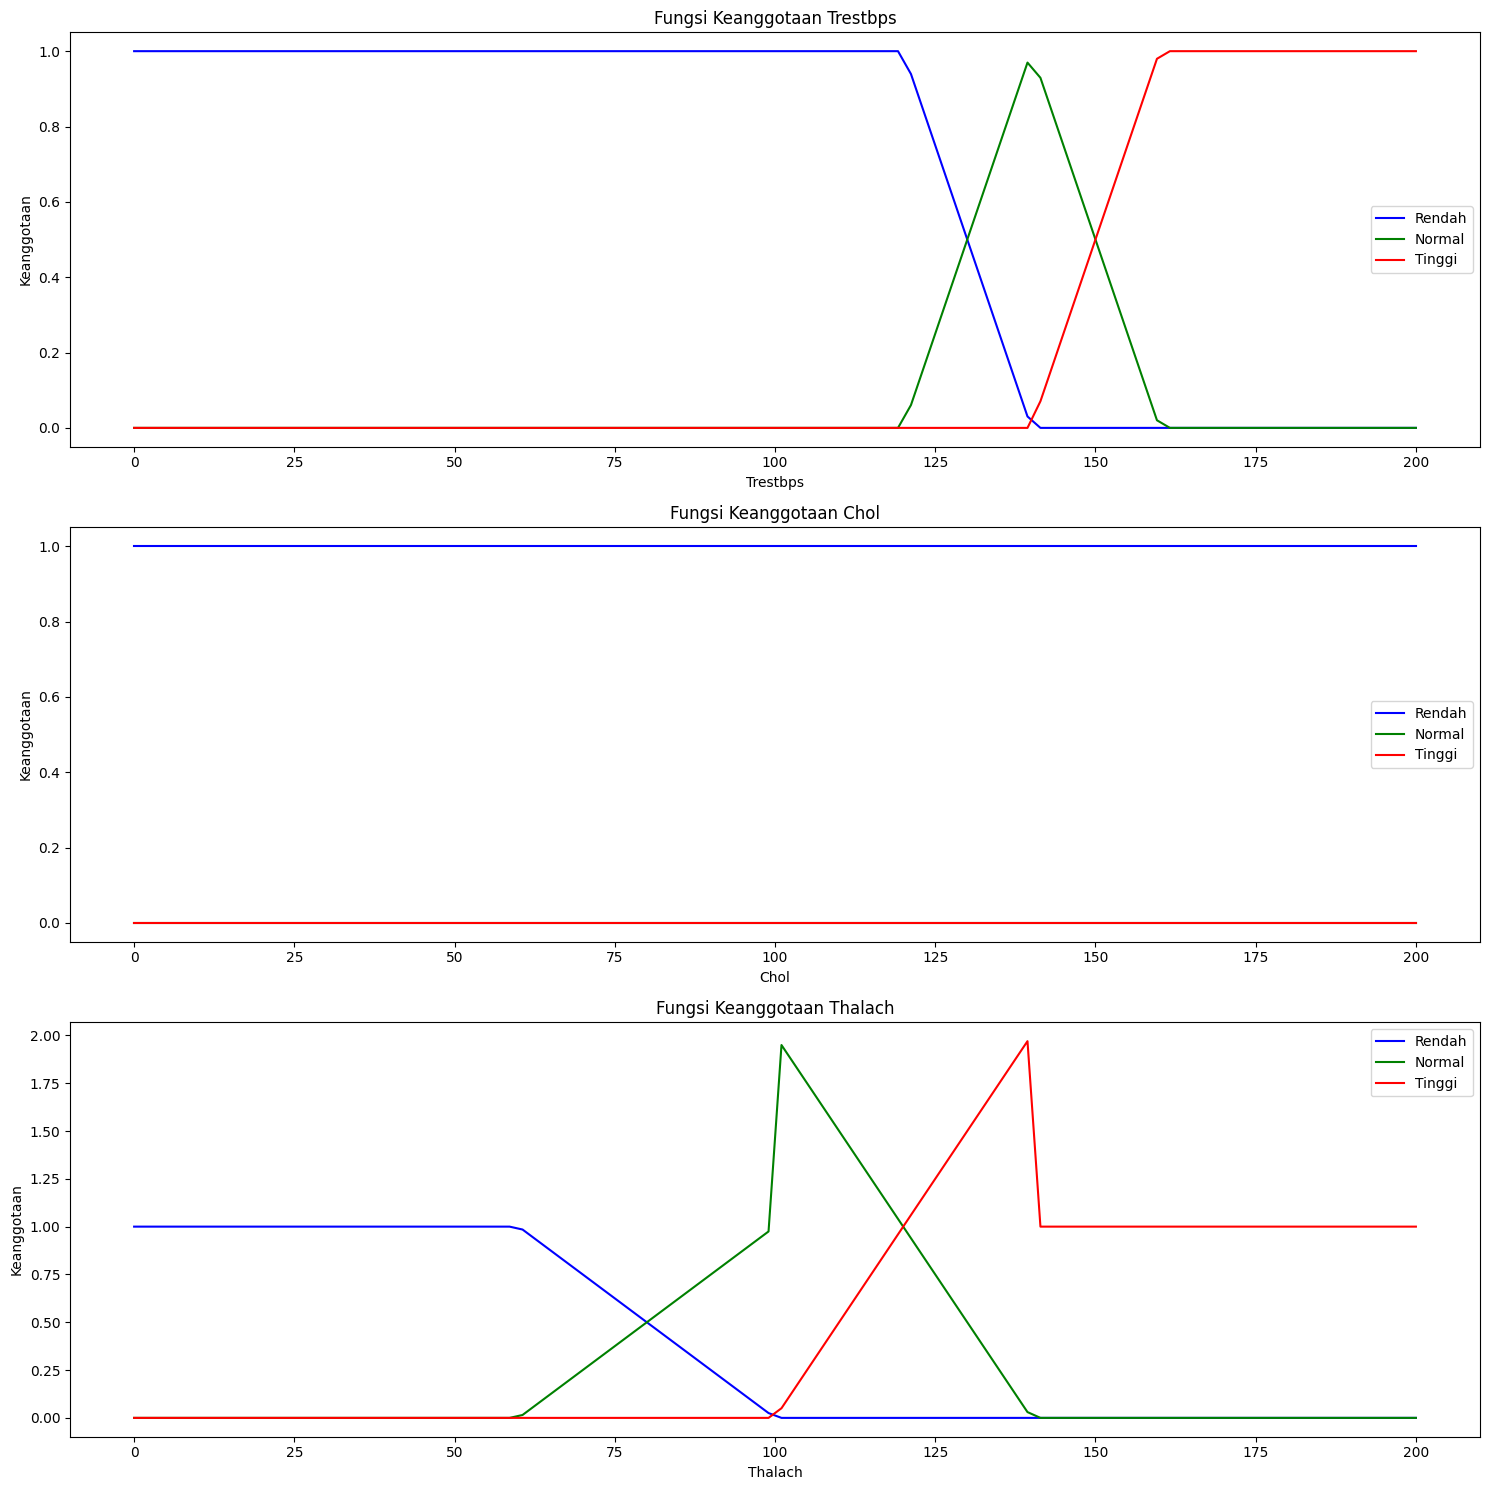

In [ ]:
# Visualisasi
x = np.linspace(0, 200, 100)
y_trestbps = [trestbps_membership(i) for i in x]
y_chol = [chol_membership(i) for i in x]
y_thalach = [thalach_membership(i) for i in x]

plt.figure(figsize=(15, 15))

# Trestbps
plt.subplot(3, 1, 1)
plt.plot(x, [y[0] for y in y_trestbps], label='Rendah', color='blue')
plt.plot(x, [y[1] for y in y_trestbps], label='Normal', color='green')
plt.plot(x, [y[2] for y in y_trestbps], label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan Trestbps')
plt.xlabel('Trestbps')
plt.ylabel('Keanggotaan')
plt.legend()

# Chol
plt.subplot(3, 1, 2)
plt.plot(x, [y[0] for y in y_chol], label='Rendah', color='blue')
plt.plot(x, [y[1] for y in y_chol], label='Normal', color='green')
plt.plot(x, [y[2] for y in y_chol], label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan Chol')
plt.xlabel('Chol')
plt.ylabel('Keanggotaan')
plt.legend()

# Thalach
plt.subplot(3, 1, 3)
plt.plot(x, [y[0] for y in y_thalach], label='Rendah', color='blue')
plt.plot(x, [y[1] for y in y_thalach], label='Normal', color='green')
plt.plot(x, [y[2] for y in y_thalach], label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan Thalach')
plt.xlabel('Thalach')
plt.ylabel('Keanggotaan')
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas didapatkan kesimpulan :

* Trestbps

  -  *Sumbu X* : Nilai tekanan darah istirahat (Trestbps).
  -  *Sumbu Y* : Derajat keanggotaan (0 hingga 1).
  - Tiga kategori atau label keanggotaan:
  1. *Rendah* (ditampilkan dalam warna biru): Memiliki keanggotaan penuh (nilai 1) untuk Trestbps hingga sekitar 125, kemudian menurun hingga nol setelah nilai tersebut.
  2. *Normal* (ditampilkan dalam warna hijau): Keanggotaan puncaknya berada di sekitar Trestbps 135 dan berkurang ke nol untuk nilai yang lebih kecil dari sekitar 125 atau lebih besar dari sekitar 150.
  3. *Tinggi* (ditampilkan dalam warna merah): Keanggotaan penuh (nilai 1) untuk Trestbps lebih dari sekitar 150, dan keanggotaan berkurang mulai dari sekitar 125.


* Chol

  - *Sumbu X*: Nilai kolesterol (Chol).
  - *Sumbu Y*: Derajat keanggotaan (0 hingga 1).
  - Hanya ada satu kategori, *Rendah* (warna biru), yang memiliki keanggotaan   penuh (nilai 1) untuk seluruh rentang nilai Chol.
  - Kategori *Normal* dan *Tinggi* (seharusnya ada, berdasarkan label di grafik Trestbps) tidak ditampilkan, karena parameter fungsi keanggotaan tersebut bernilai nol untuk seluruh rentang nilai Chol.


* Thalach
  - *Sumbu X*: Nilai detak jantung maksimum yang dicapai (Thalach).
  - *Sumbu Y*: Derajat keanggotaan (0 hingga 1).
  - Terdapat tiga kategori fuzzy:
  1. *Rendah* (biru): Memiliki keanggotaan penuh hingga nilai sekitar 75, kemudian menurun ke nol hingga sekitar 100.
  2. *Normal* (hijau): Memiliki keanggotaan penuh di sekitar nilai 125 dan menurun ke nol di bawah 75 atau di atas 150.
  3. *Tinggi* (merah): Memiliki keanggotaan penuh untuk nilai Thalach di atas 150, dengan nilai keanggotaan mulai naik dari sekitar 125.




#**METODE SUGENO**

Metode Sugeno adalah metode yang bagian output sistemnya tidak berupa himpunan fuzzy melainkan sebuah konstanta (orde nol) atau persamaan linear (orde satu). Konsep metode sugeno diperlukan kriteria-kriteria dan nilai bobot setiap kriterianya untuk melakukan sebuah perhitungan.

In [ ]:
# Fungsi keanggotaan untuk Trestbps
def trestbps_membership(x):
    if x < 120:
        return 1, 0, 0  # Rendah, Normal, Tinggi
    elif 120 <= x < 140:
        return (140 - x) / 20, (x - 120) / 20, 0
    elif 140 <= x < 160:
        return 0, (160 - x) / 20, (x - 140) / 20
    else:
        return 0, 0, 1

# Fungsi keanggotaan untuk Chol
def chol_membership(x):
    if x < 200:
        return 1, 0, 0  # Rendah, Normal, Tinggi
    elif 200 <= x < 240:
        return (240 - x) / 40, (x - 200) / 40, 0
    elif 240 <= x < 260:
        return 0, (260 - x) / 20, (x - 240) / 20
    else:
        return 0, 0, 1

# Fungsi keanggotaan untuk Thalach
def thalach_membership(x):
    if x < 60:
        return 1, 0, 0  # Rendah, Normal, Tinggi
    elif 60 <= x < 100:
        return (100 - x) / 40, (x - 60) / 40, 0
    elif 100 <= x < 140:
        return 0, (140 - x) / 20, (x - 100) / 20
    else:
        return 0, 0, 1

## Nilai linguistik setiap variabel

In [ ]:
# Definisi variabel linguistik
linguistic_variables = {
    'Trestbps': {
        'Rendah': (0, 120),
        'Normal': (120, 140, 160),
        'Tinggi': (160, 200)
    },
    'Chol': {
        'Rendah': (0, 200),
        'Normal': (200, 240, 260),
        'Tinggi': (260, 400)
    },
    'Thalach': {
        'Rendah': (0, 60),
        'Normal': (60, 100, 140),
        'Tinggi': (140, 200)
    }
}

## Variabel linguistik dalam bentuk tabel

In [ ]:
# Fungsi untuk menampilkan variabel linguistik dalam bentuk tabel
def display_linguistic_variables_table():
    table = PrettyTable()
    table.field_names = ["Variabel", "Label", "Rentang"]

    for var, ranges in linguistic_variables.items():
        for label, range_values in ranges.items():
            range_str = ", ".join(map(str, range_values))
            table.add_row([var, label, range_str])

    print(table)

# Menampilkan variabel linguistik dalam bentuk tabel
display_linguistic_variables_table()

+----------+--------+---------------+
| Variabel | Label  |    Rentang    |
+----------+--------+---------------+
| Trestbps | Rendah |     0, 120    |
| Trestbps | Normal | 120, 140, 160 |
| Trestbps | Tinggi |    160, 200   |
|   Chol   | Rendah |     0, 200    |
|   Chol   | Normal | 200, 240, 260 |
|   Chol   | Tinggi |    260, 400   |
| Thalach  | Rendah |     0, 60     |
| Thalach  | Normal |  60, 100, 140 |
| Thalach  | Tinggi |    140, 200   |
+----------+--------+---------------+


Berdasarkan output di atas, metode Mamdani memiliki beberapa 3 tingkatan pada masing-masing variabel.

Variabel Linguistik: Trestbps
  - Rendah: (0, 120)
  - Normal: (120, 140, 160)
  - Tinggi: (160, 200)

Pada hasil di atas, dapat dijelaskan bahwa:

- Kategori **Rendah** artinya keanggotaan Fuzzy berada pada tekanan di rentang 0 hingga 120, dapat dikatakan pula bahwa anggotanya memiliki tekanan yang berada pada nilai di bawah 120.
- Kategori **Normal** memiliki anggota dengan tekanan di antara 2 titik yaitu pada rentang 120 hingga 140 dan pada rentang 140 hingga 160.
- Kategori **Tinggi** memiliki anggota dengan tekanan tertinggi yaitu di antara 160 hingga 120.

Variabel Linguistik: Chol
  - Rendah: (0, 200)
  - Normal: (200, 240, 260)
  - Tinggi: (260, 400)

Pada hasil di atas, dapat dijelaskan bahwa:

- Kategori **Rendah** artinya keanggotaan Fuzzy berada pada kolesterol rendah yaitu di rentang 0 hingga 200, dapat dikatakan pula bahwa anggotanya memiliki kolesterol yang berada pada nilai di bawah 200.
- Kategori **Normal** memiliki anggota dengan kolesterol di antara 2 titik yaitu pada rentang 200 hingga 240 dan pada rentang 240 hingga 260.
- Kategori **Tinggi** memiliki anggota dengan kolesterol tertinggi yaitu di antara 260 hingga 400.

Variabel Linguistik: Thalach
  - Rendah: (0, 60)
  - Normal: (60, 100, 140)
  - Tinggi: (140, 200)

Pada hasil di atas, dapat dijelaskan bahwa:

- Kategori **Rendah** artinya keanggotaan Fuzzy berada pada denyut yang rendah yaitu di rentang 0 hingga 60, dapat dikatakan pula bahwa anggotanya memiliki denyut yang berada pada nilai di bawah 60.
- Kategori **Normal** memiliki anggota dengan denyut di antara 2 titik yaitu pada rentang 60 hingga 100 dan pada rentang 100 hingga 140.
- Kategori **Tinggi** memiliki anggota dengan denyut tertinggi yaitu di antara 140 hingga 200.


## Bentuk fungsi keanggotaan

In [ ]:
# Menghitung keanggotaan untuk setiap baris
membership_data = []

for index, row in data.iterrows():
    trestbps = row['trestbps']
    chol = row['chol']
    thalach = row['thalach']

    trestbps_membership_values = trestbps_membership(trestbps)
    chol_membership_values = chol_membership(chol)
    thalach_membership_values = thalach_membership(thalach)

    membership_data.append({
        'Trestbps': trestbps,
        'Chol': chol,
        'Thalach': thalach,
        'Trestbps_Rendah': trestbps_membership_values[0],
        'Trestbps_Normal': trestbps_membership_values[1],
        'Trestbps_Tinggi': trestbps_membership_values[2],
        'Chol_Rendah': chol_membership_values[0],
        'Chol_Normal': chol_membership_values[1],
        'Chol_Tinggi': chol_membership_values[2],
        'Thalach_Rendah': thalach_membership_values[0],
        'Thalach_Normal': thalach_membership_values[1],
        'Thalach_Tinggi': thalach_membership_values[2],
    })

# Membuat DataFrame untuk hasil keanggotaan
membership_df = pd.DataFrame(membership_data)

# Menggunakan PrettyTable untuk menampilkan tabel
table = PrettyTable()

# Menambahkan kolom ke tabel
table.field_names = [
    "Trestbps", "Chol", "Thalach",
    "Trestbps_Rendah", "Trestbps_Normal", "Trestbps_Tinggi",
    "Chol_Rendah", "Chol_Normal", "Chol_Tinggi",
    "Thalach_Rendah", "Thalach_Normal", "Thalach_Tinggi"
]

# Menambahkan baris ke tabel
for index, row in membership_df.iterrows():
    table.add_row([
        row['Trestbps'],
        row['Chol'],
        row['Thalach'],
        f"{row['Trestbps_Rendah']:.2f}",
        f"{row['Trestbps_Normal']:.2f}",
        f"{row['Trestbps_Tinggi']:.2f}",
        f"{row['Chol_Rendah']:.2f}",
        f"{row['Chol_Normal']:.2f}",
        f"{row['Chol_Tinggi']:.2f}",
                f"{row['Thalach_Rendah']:.2f}",
        f"{row['Thalach_Normal']:.2f}",
        f"{row['Thalach_Tinggi']:.2f}",
    ])

# Menampilkan tabel
print(table)

+----------+-------+---------+-----------------+-----------------+-----------------+-------------+-------------+-------------+----------------+----------------+----------------+
| Trestbps |  Chol | Thalach | Trestbps_Rendah | Trestbps_Normal | Trestbps_Tinggi | Chol_Rendah | Chol_Normal | Chol_Tinggi | Thalach_Rendah | Thalach_Normal | Thalach_Tinggi |
+----------+-------+---------+-----------------+-----------------+-----------------+-------------+-------------+-------------+----------------+----------------+----------------+
|  145.0   | 233.0 |  150.0  |       0.00      |       0.75      |       0.25      |     0.17    |     0.82    |     0.00    |      0.00      |      0.00      |      1.00      |
|  130.0   | 250.0 |  187.0  |       0.50      |       0.50      |       0.00      |     0.00    |     0.50    |     0.50    |      0.00      |      0.00      |      1.00      |
|  130.0   | 204.0 |  172.0  |       0.50      |       0.50      |       0.00      |     0.90    |     0.10   

## Batas-batas nilai linguistik dan Fuzzy Rule

In [ ]:
# Fungsi untuk menghitung output fuzzy Sugeno
def sugeno(trestbps, chol, thalach):
    # Hitung keanggotaan
    trestbps_rendah, trestbps_normal, trestbps_tinggi = trestbps_membership(trestbps)
    chol_rendah, chol_normal, chol_tinggi = chol_membership(chol)
    thalach_rendah, thalach_normal, thalach_tinggi = thalach_membership(thalach)

    # Aturan fuzzy Sugeno
    # Contoh aturan: Jika Trestbps adalah Rendah dan Chol adalah Rendah, maka Output adalah 1
    output_rendah = min(trestbps_rendah, chol_rendah) * 1  # Output = 1
    output_normal = min(trestbps_normal, chol_normal) * 2  # Output = 2
    output_tinggi = min(trestbps_tinggi, chol_tinggi) * 3  # Output = 3

    # Menghitung output total
    total_output = output_rendah + output_normal + output_tinggi
    total_weight = (trestbps_rendah + trestbps_normal + trestbps_tinggi +
                    chol_rendah + chol_normal + chol_tinggi)

    if total_weight == 0:
        return 0  # Jika tidak ada keanggotaan
    return total_output / total_weight

# Contoh input
trestbps_input = 130
chol_input = 220
thalach_input = 80

# Hitung output
output_sugeno = sugeno(trestbps_input, chol_input, thalach_input)
print(f"Output Sugeno: {output_sugeno}")

Output Sugeno: 0.75


## Visualisasi

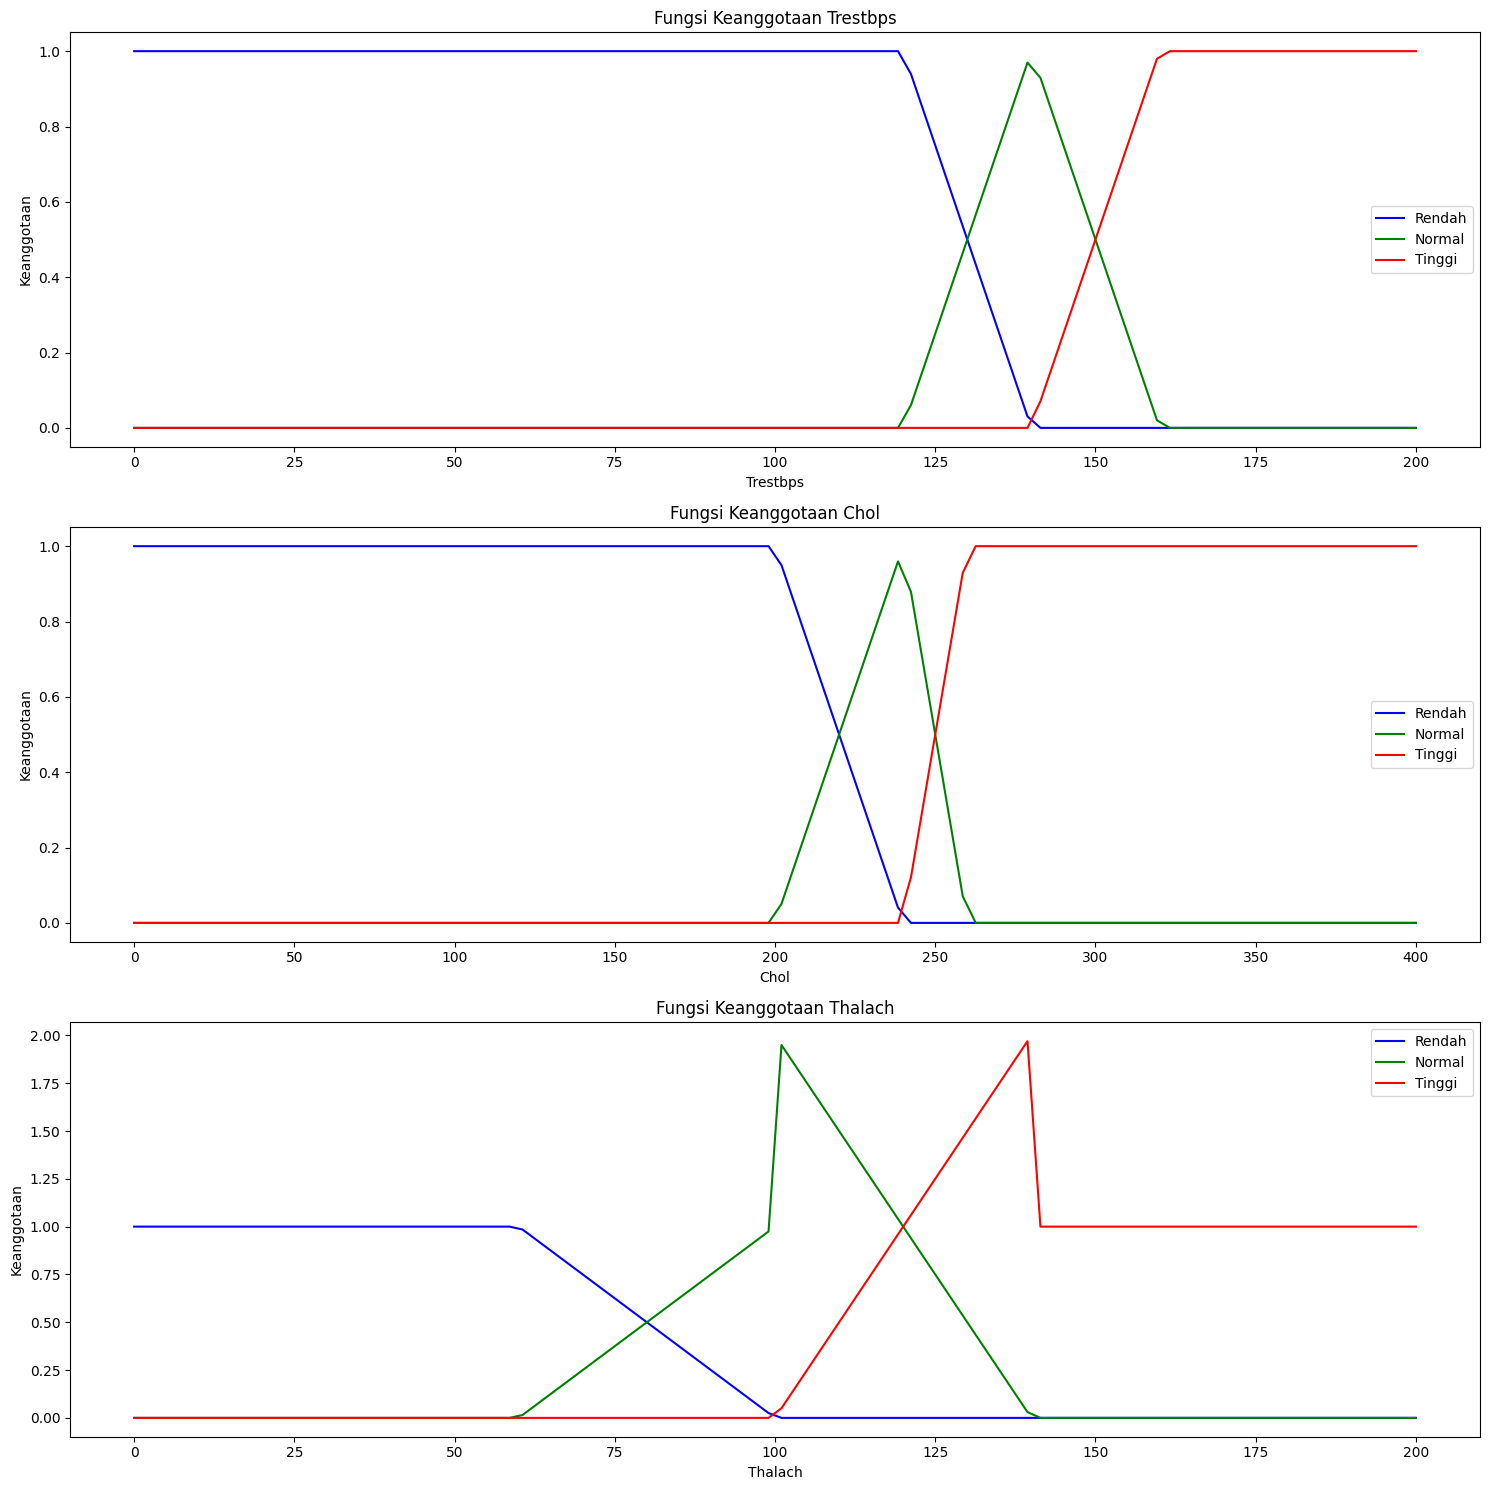

In [ ]:
# Visualisasi
# Define x values for plotting
x_trestbps = np.linspace(0, 200, 100)
x_chol = np.linspace(0, 400, 100)
x_thalach = np.linspace(0, 200, 100)

# Compute y values (membership values) for plotting
y_trestbps = np.array([trestbps_membership(i) for i in x_trestbps])
y_chol = np.array([chol_membership(i) for i in x_chol])
y_thalach = np.array([thalach_membership(i) for i in x_thalach])


plt.figure(figsize=(15, 15))

# Trestbps
plt.subplot(3, 1, 1)
plt.plot(x_trestbps, y_trestbps[:, 0], label='Rendah', color='blue')
plt.plot(x_trestbps, y_trestbps[:, 1], label='Normal', color='green')
plt.plot(x_trestbps, y_trestbps[:, 2], label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan Trestbps')
plt.xlabel('Trestbps')
plt.ylabel('Keanggotaan')
plt.legend()

# Chol
plt.subplot(3, 1, 2)
plt.plot(x_chol, y_chol[:, 0], label='Rendah', color='blue')
plt.plot(x_chol, y_chol[:, 1], label='Normal', color='green')
plt.plot(x_chol, y_chol[:, 2], label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan Chol')
plt.xlabel('Chol')
plt.ylabel('Keanggotaan')
plt.legend()

# Thalach
plt.subplot(3, 1, 3)
plt.plot(x_thalach, y_thalach[:, 0], label='Rendah', color='blue')
plt.plot(x_thalach, y_thalach[:, 1], label='Normal', color='green')
plt.plot(x_thalach, y_thalach[:, 2], label='Tinggi', color='red')
plt.title('Fungsi Keanggotaan Thalach')
plt.xlabel('Thalach')
plt.ylabel('Keanggotaan')
plt.legend()

# Menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi di atas didapatkan kesimpulan :

* Trestbps

- Kategori Rendah (biru):
Tekanan darah dengan nilai ≤125 memiliki keanggotaan penuh (1).
Menurun secara linier hingga 0 di nilai 150.
- Kategori Normal (hijau):
Tekanan darah berada dalam rentang 125–150 memiliki keanggotaan tertinggi pada nilai sekitar 135.
Menurun menuju 0 di luar rentang ini.
- Kategori Tinggi (merah):
Tekanan darah mulai aktif di nilai sekitar 150.
Memiliki keanggotaan penuh (1) di atas 175.

Dapat diartikan bahwa :
Individu dengan tekanan darah rendah memiliki kemungkinan risiko jantung yang kecil.
Tekanan darah normal menunjukkan kondisi rata-rata dengan risiko sedang.
Tekanan darah tinggi menunjukkan peningkatan risiko penyakit jantung karena tekanan berlebih pada pembuluh darah.

* Interpretasi Variabel Chol
- Kategori Rendah (biru):
Kadar kolesterol ≤200 memiliki keanggotaan penuh (1).
Menurun secara linier hingga 0 pada nilai 250.
- Kategori Normal (hijau):
Kolesterol dalam rentang 200–250 memiliki keanggotaan tertinggi pada nilai sekitar 225.
Menurun menuju 0 di luar rentang ini.
- Kategori Tinggi (merah):
Kolesterol mulai aktif di sekitar nilai 250.
Memiliki keanggotaan penuh (1) di atas 300.

Dapat diartikan bahwa:
Kolesterol rendah menunjukkan kondisi ideal dengan risiko kecil.
Kolesterol normal menunjukkan risiko moderat yang memerlukan pengawasan.
Kolesterol tinggi mengindikasikan risiko signifikan terhadap penyakit jantung akibat potensi penyumbatan pembuluh darah.

* Thalach

- Kategori Rendah (Garis Biru):
Keanggotaan penuh (nilai 1) untuk Thalach pada nilai yang lebih rendah (0 hingga sekitar 90).
Keanggotaan menurun secara linier mulai dari nilai Thalach sekitar 90 hingga mendekati 110.
Setelah itu, keanggotaan bernilai nol untuk Thalach di atas 110.
- Kategori Normal (Garis Hijau):
Keanggotaan mulai meningkat secara linier dari nol pada nilai Thalach sekitar 90.
Keanggotaan penuh (nilai 1) di tengah (sekitar 110 hingga 130), menunjukkan rentang nilai yang dianggap "Normal".
Keanggotaan menurun secara linier mulai dari Thalach sekitar 130 hingga 150.
Di atas 150, keanggotaan untuk kategori ini bernilai nol.
- Kategori Tinggi (Garis Merah):
Keanggotaan mulai meningkat secara linier dari nol pada Thalach sekitar 130.
Keanggotaan penuh (nilai 1) untuk nilai Thalach di atas 150.
Untuk nilai yang lebih rendah dari 130, kategori ini tidak memiliki keanggotaan (nol).

## **KESIMPULAN**

- **Metode Mamdani**: Lebih unggul pada sistem berupa logika Fuzzy yang adaptif dan memerlukan interpretasi yang berbasis keanggotaan. Output metode Mamdani adalah Fuzzy Set dan lebih kompleks dalam proses komputasinya.

- **Metode Sugeno**: Lebih unggul dan bagus untuk sistem real-time dimana outputnya berupa numerik langsung. Pada regresi linier sederhana, Sugeno merupakan metode yang bagus dan ideal. Output metode Sugeno adalah Fungsi Linear atau Konstan serta lebih sederhana dalam proses komputasi.

Kesimpulan dari percobaan yang dilakukan adalah metode Sugeno lebih cepat dalam menghasilkan output numerik secara langsung, sedangkan metode Mamdani lebih unggul dalam merepresentasikan Fuzzy pada aplikasi yang memiliki interpretasi kompleks berbasis keanggotaan.